## Measuring Performance ##
In this notebook, we will analyse the behaviour of the parallel crawler for different number of threads.

In [1]:
# necessary imports
import subprocess
import matplotlib.pyplot as plt

In [10]:
##  PLOT num_threads vs time

num_threads = 10
max_size = 100
n_iter = 5
time_insertion = dict()

for i in range(1, num_threads):
    time_insertion[i] = dict()
    output = subprocess.run(["./main", "https://en.wikipedia.org/wiki/Main_Page", str(i), str(max_size), str(n_iter)], capture_output=True)
    
    for inser_str in output.stdout.decode("utf-8").split('\n'):

        if inser_str == '': continue

        if (len(inser_str.split(' '))) != 2:
            print(inser_str)
            raise AssertionError

        curr_ins, time_i = inser_str.split(' ')
        time_insertion[i][int(curr_ins)] = int(time_i)


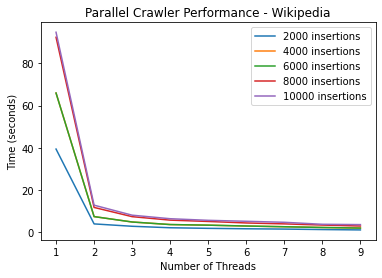

In [3]:
plt.title("Parallel Crawler Performance - Wikipedia")
plt.xlabel("Number of Threads")
plt.ylabel("Time (seconds)")
insertions_performed = list(time_insertion[1].keys())
for ins in insertions_performed:
    X, Y = [], []
    for (t, t_info) in time_insertion.items():
        X.append(t)
        Y.append(t_info[ins] * 1e-6)
    plt.plot(X, Y, label = f"{ins} insertions")
plt.legend()
plt.show()


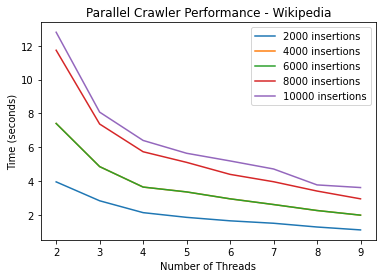

In [4]:
plt.title("Parallel Crawler Performance - Wikipedia")
plt.xlabel("Number of Threads ( >=  2) ")
plt.ylabel("Time (seconds)")
insertions_performed = list(time_insertion[1].keys())
for ins in insertions_performed:
    X, Y = [], []
    for (t, t_info) in time_insertion.items():
        if t == 1:
            continue
        X.append(t)
        Y.append(t_info[ins] * 1e-6)
    plt.plot(X, Y, label = f"{ins} insertions")
plt.legend()
plt.show()
